This notebook is a damn copy of ```regularization_and_smoothing_plots_Scaled_3Masks.ipynb``` from 
```/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/00_first_investigation_Grant_4Fields/```


In [1]:
import csv
import numpy as np
import pandas as pd
from math import factorial

import datetime
from datetime import date
import datetime
import time

import scipy
import os, os.path
from os import listdir
from os.path import isfile, join

import re
# from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

import sys


# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

### Set up directories

In [2]:
data_dir = "/Users/hn/Documents/01_research_data/2021_doubleCroppedFieldDetection/01_idx/"

In [3]:
# import glob
# All files ending with .txt
# glob.glob(data_dir + "*.csv")

file_names = [x for x in os.listdir(data_dir) if x.endswith(".csv")]
file_names

['AdamsFrankBentonGrant_IrrAnn_SH2016_IY_2021.csv',
 'AdamsFrankBentonGrant_IrrAnn_SH2017_IY_2021.csv',
 'AdamsFrankBentonGrant_IrrAnn_SH2018_IY_2021.csv']

# Reda the damn data. There is no end to these projects!

In [4]:
dataframe_list = []

A = pd.read_csv(data_dir + file_names[0])
A = A[A['NDVI'].notna()]
dataframe_list.append(A)

A = pd.read_csv(data_dir + file_names[1])
A = A[A['NDVI'].notna()]
dataframe_list.append(A)

A = pd.read_csv(data_dir + file_names[2])
A = A[A['NDVI'].notna()]
dataframe_list.append(A)

In [5]:
all_data = pd.concat(dataframe_list)
all_data.reset_index(drop=True, inplace=True)
all_data = nc.add_human_start_time_by_system_start_time(all_data)

all_data["dataset"] = "Sentinel"

# are there indentical fields in these 3 years?

In [6]:
all_data.head(2)

,ID,county,CropTyp,Irrigtn,LstSrvD,EVI,NDVI,system_start_time,cntrd_lt,cntrd_ln,human_system_start_time,dataset
0,54185_WSDA_SF_2016,Adams,alfalfa hay,center pivot,2016/09/27 00:00:00,0.076856,0.047853,1.578251e+09,47.069257,-118.187758,2020-01-05,Sentinel
1,54520_WSDA_SF_2016,Adams,alfalfa hay,sprinkler,2016/09/27 00:00:00,0.054747,0.040360,1.578251e+09,47.065840,-118.192527,2020-01-05,Sentinel


In [17]:
all_data['centroid'] = (all_data['cntrd_lt'].astype(str)) + (all_data['cntrd_ln'].astype(str))

,ID,county,CropTyp,Irrigtn,LstSrvD,EVI,NDVI,system_start_time,cntrd_lt,cntrd_ln,human_system_start_time,dataset,centroid
0,54185_WSDA_SF_2016,Adams,alfalfa hay,center pivot,2016/09/27 00:00:00,0.076856,0.047853,1.578251e+09,47.069257,-118.187758,2020-01-05,Sentinel,47.06925743-118.18775769
1,54520_WSDA_SF_2016,Adams,alfalfa hay,sprinkler,2016/09/27 00:00:00,0.054747,0.040360,1.578251e+09,47.065840,-118.192527,2020-01-05,Sentinel,47.06584023-118.19252723


In [19]:
len(list(np.sort(all_data.centroid.unique())))

20805

In [13]:
ID_list = list(np.sort(all_data.ID.unique()))

In [14]:
len(ID_list)

47607

In [15]:
all_data.head(2)

,ID,county,CropTyp,Irrigtn,LstSrvD,EVI,NDVI,system_start_time,cntrd_lt,cntrd_ln,human_system_start_time,dataset,centroid
0,54185_WSDA_SF_2016,Adams,alfalfa hay,center pivot,2016/09/27 00:00:00,0.076856,0.047853,1.578251e+09,47.069257,-118.187758,2020-01-05,Sentinel,0 47.069257\n1 47.065840\n2 ...
1,54520_WSDA_SF_2016,Adams,alfalfa hay,sprinkler,2016/09/27 00:00:00,0.054747,0.040360,1.578251e+09,47.065840,-118.192527,2020-01-05,Sentinel,0 47.069257\n1 47.065840\n2 ...


### Set the plotting style

In [25]:
size = 20

params = {'legend.fontsize': 2,
          'figure.figsize': (3, 4),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.6,
          'ytick.labelsize': size * 0.6,
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)
# pylab.rcParams.update(params)
# plt.rc('text', usetex=True)

In [26]:
VI="NDVI"
interval_size = 10

# All Smoothed versions against each other with raw 

In [27]:
color_dict = {'raw': 'r','Sentinel': 'dodgerblue'}

Populating the interactive namespace from numpy and matplotlib


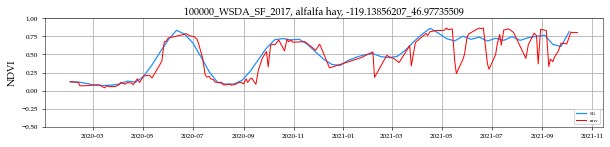

In [28]:
from IPython.display import clear_output
import pandas as pd
import time
%pylab inline --no-import-all
%load_ext autoreload

%autoreload
import NASA_core as nc
import NASA_plot_core as npc


size = 10
tickWidth = 0.6
tickLength = 3
params = {'legend.fontsize': size * 0.5,
          'figure.figsize': (10, 2),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.7,
          'ytick.labelsize': size * 0.7,
          'axes.titlepad': 2,
          'axes.linewidth' : 0.5,
          'xtick.major.size' : tickLength,
          'xtick.major.width': tickWidth, 
          'xtick.minor.size' : tickLength,
          'xtick.minor.width' : tickWidth,
          'ytick.major.size' : tickLength,
          'ytick.major.width': tickWidth, 
          'ytick.minor.size' : tickLength,
          'ytick.minor.width' : tickWidth,
          'legend.loc': 'lower left'}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True

plt.rcParams.update(params)

# pylab.rcParams.update(params)
# plt.rc('text', usetex=True)
Lwidth = 1

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0.3, 'wspace': .05});
ax.grid(True)


curr_dt = all_data[all_data.ID == ID_list[0]].copy()
curr_dt.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.one_satellite_smoothed(raw_dt=curr_dt, ax=ax, color_dict=color_dict, idx=VI, time_step_size=interval_size)

ax.plot(curr_dt['human_system_start_time'], curr_dt['NDVI'], 
        label = "raw", linewidth=Lwidth, color='r')

assert (len(curr_dt.cntrd_ln.unique()) == 1)
assert (len(curr_dt.cntrd_lt.unique()) == 1)
centriod = ", " + str(curr_dt.cntrd_ln.unique()[0]) + "_" + str(curr_dt.cntrd_lt.unique()[0])
# centriod =  ", " + str(curr_dt.centroid_long.unique()[0]) + "_" + str(curr_dt.centroid_lat.unique()[0] )
ax.set_title(curr_dt.ID.unique()[0] + ", " + curr_dt.CropTyp.unique()[0] + centriod) 
ax.set_ylabel('NDVI') # , labelpad=20); # fontsize = label_FontSize,
ax.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax.legend(loc="lower right");


file_name = data_dir + "figures/"+ ID_list[0] + ".pdf"
os.makedirs(data_dir + "figures/", exist_ok=True)
plt.savefig(fname = file_name, dpi=400, transparent=False, bbox_inches='tight'); # 

In [46]:
len(all_data.ID.unique())

47607

In [30]:
curr_dt.county.unique()[0]

'Grant'